#### CMSE 201 Final Project
### &#9989; Josh Wolf
### &#9989; Section_008
#### &#9989; 18 April 2021

 # 1 ___The Payroll Problem in the MLB___

## 1.1 Background and Motivation

All my life I have played and watched baseball. I love Major League Baseball, and there is nothing like watching the Playoffs and World Series every fall. However, one issue that was always bothered me is the lack of parity. This seperation of "tiers" that exists between teams has haunted the league for decades. The main cause of this league-wide disparity is a factor called market size. The term originally comes from TV markets, which still make up a majority of the phrase's meaning, due to regional rules from the MLB about broadcasting and TV rights. Other contributers to a team's market size are things such as metropolitan size, state of stadium/facilities, owner wealth, and anything else that might impact their revenue stream.

The problem with having big market and small market teams is that the current state of MLB is practially a free market. Teams are basically able to spend as much money for their payroll as their owner deems necessary. Some teams, like the New York Yankees or Los Angeles Dodgers, spend hundreds of millions annually while other teams (Kansas City Royals, Pittsburgh Pirates, Tampa Bay Rays) spend under $100 million. From there it is pretty clear to come to the conclusion that some franchises might have advantages over others.

My question is what is the disadvantage these small market teams face? And if there is a clear disadvantage, how should they spend their smaller payrolls accordingly?

## 1.2 Methodology

### 1.2.1 Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math


### 1.2.2 Defining Small Market Teams

The first thing I had to do before I started any coding was define which teams fall into the category of "small market". I did some research and found an updated list from *Bleacher Report* ranking all 30 teams by market size. I decided to seperate the list and call the bottom half "small market" teams.

In the following cell, I read in the "teams" data using pandas. This dataset includes team statistics going all the way back to 1871. I filtered the dataset to include only the teams I deemed "small market" and included data from 1985 to 2016. Finally, I chose to keep only the columns I thought were important (Year, League, Team, and if they won the World Series or not).

In [2]:
teams = pd.read_csv("Sean Lahman Database (Baseball)/core/Teams.csv",delimiter=',',skiprows=0,encoding='utf-8') # Loading in dataset using pandas
# The next line filters for only the teams that I defined as small market by using their 'teamID'
small_markets = teams[(teams["teamID"] == 'MIA') | (teams["teamID"] == 'TBA') | (teams["teamID"] == 'KCA') | (teams["teamID"] == 'CIN') | (teams["teamID"] == 'OAK') | (teams["teamID"] == 'CLE') | (teams["teamID"] == 'MIL') | (teams["teamID"] == 'DET') | (teams["teamID"] == 'PIT') | (teams["teamID"] == 'COL') | (teams["teamID"] == 'ARI') | (teams["teamID"] == 'MIN') | (teams["teamID"] == 'BAL') | (teams["teamID"] == 'SDN') | (teams["teamID"] == 'SEA')]
small_1985 = small_markets[small_markets['yearID'] >= 1985] # Starting dataset at 1985
small_1985 = small_1985[small_markets['yearID'] < 2017] # Ending at 2016, I had to use 2016 because on of the other datasets only went to 2016
small_1985 = small_1985[['yearID', 'lgID', 'teamID', 'WSWin']] # Only including these columns when I view the df
small_1985.head() # Making sure the first five entries are correct. They should be small market teams from the 1985 season

/var/folders/xz/97kb2dfs3977k6m98p_mhz2h0000gn/T/ipykernel_18067/250792495.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  small_1985 = small_1985[small_markets['yearID'] < 2017] # Ending at 2016, I had to use 2016 because on of the other datasets only went to 2016


,yearID,lgID,teamID,WSWin
1918,1985,AL,BAL,N
1923,1985,NL,CIN,N
1924,1985,AL,CLE,N
1925,1985,AL,DET,N
1927,1985,AL,KCA,Y


### 1.2.3 Calculating Mean Small Market Salary for Each Year

Next I had to load in data that includes player salaries. I used this dataset to find the salary for each team, and the mean salary for small market teams for each year. This step was imperative for me to be able to compare the mean small market salary to the salary of a world series winning team.

Once I loaded in the salaries dataset, I needed to merge it to the small market data. I used a left merge and labeled the columns that each dataset has in common. After merging the datasets, I grouped by the year, and totalled the salaries for each year by finding the sum.

After finding the sum of all the small market teams' salaries for each year, I was able to divide by 15 (the amount of small market teams). This was my way of calculating the mean small market team salary for each year.

In [3]:
salaries = pd.read_csv("Sean Lahman Database (Baseball)/core/Salaries.csv",delimiter=',',skiprows=0,encoding='utf-8') # Loading in dataset using pandas

# The following line merges the 'salaries' with the small market dataframe I created previously
small_salary = small_1985.merge(salaries, how = 'left', on = ['yearID', 'teamID', 'lgID']) # on = columns that the dataframes have in common
small_team_salary = small_salary.groupby(['yearID'], as_index = False).sum() # Grouping by year and finding the total salary

small_team_mean_sal = small_team_salary.div([1, 15], axis='columns') # Dividing each year's total salary by 15 (The amount of teams) to find mean salary for each year
small_team_mean_sal.tail() # Viewing the last five entries. This shows the mean small market salary payroll for each year

,yearID,salary
27,2012.0,8.084109e+07
28,2013.0,7.818791e+07
29,2014.0,8.878724e+07
30,2015.0,1.004983e+08
31,2016.0,1.056684e+08


### 1.2.4 World Series Champion Salary for Each Year

After finding the average small market salary for each year, I had to find the salary of each World Series winner. I did this in the cell below by using the "Teams" dataset again and filtering for World Series wins from 1985 to 2016. I then merged the salary dataset again and calculated the sum of each team's salary.

This new dataset shows the year, the name of the World Series winner that year, and their salary.

In [4]:
teams_new = teams[teams["WSWin"] == 'Y'] # Filtering for teams that won the World Series
teams_ws1985 = teams_new[teams_new['yearID'] >= 1985] # Starting at 1985
teams_ws1985 = teams_ws1985[teams_new['yearID'] < 2017] # Ending at 2016
teams_ws1985 = teams_ws1985[['yearID', 'lgID', 'teamID', 'WSWin']] # Choosing which coluns I want included

ws_salary = teams_ws1985.merge(salaries, how = 'left', on = ['yearID', 'teamID', 'lgID']) # Merging the 2 dataframes the same was as part 1.2.3
ws_team_salary = ws_salary.groupby(['yearID', 'teamID'], as_index = False).sum() # Finding the total salary of each Championship team
ws_team_salary.tail() # Viewing the last five entries. This shows the salary for the team that won the World Series each year

/var/folders/xz/97kb2dfs3977k6m98p_mhz2h0000gn/T/ipykernel_18067/800763390.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  teams_ws1985 = teams_ws1985[teams_new['yearID'] < 2017] # Ending at 2016


,yearID,teamID,salary
26,2012,SFN,117620683
27,2013,BOS,151530000
28,2014,SFN,163510167
29,2015,KCA,112107025
30,2016,CHN,154067668


### 1.2.5 Analysis with Bar Plot Visualization

At this point I had the team salary for each world series winner and the mean salary for small market teams, from 1985 to 2016. Now it was time to begin analyzing and answering my question. 

My first idea was to create an overlayed bar graph that gives a quick eye test of the difference in salaries. I created this plot using the code below.

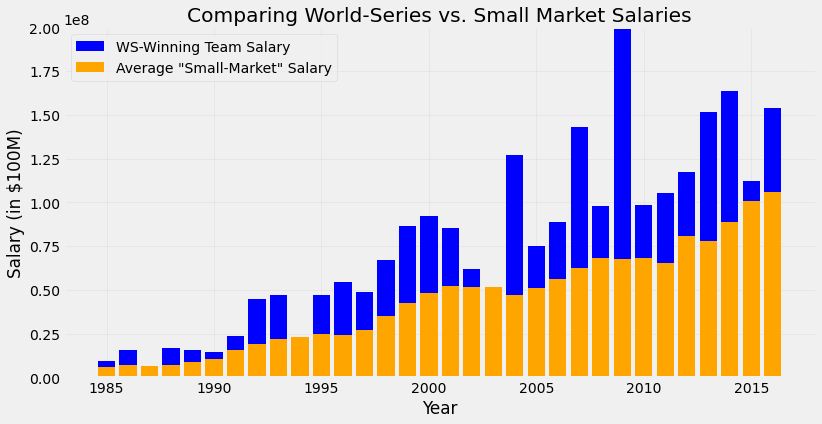

In [5]:
plt.style.use('fivethirtyeight') # Using a style I like for the plot
plt.figure(figsize=(12,6)) # Setting the figure size
plt.bar(ws_team_salary['yearID'], ws_team_salary['salary'], label = 'WS-Winning Team Salary', color = "blue") # Plotting world series salaries
plt.bar(small_team_mean_sal['yearID'], small_team_mean_sal['salary'], label = 'Average "Small-Market" Salary', color = 'orange') # Plotting mean small market salaries
plt.grid(alpha=0.25) # Creating a grid
plt.title('Comparing World-Series vs. Small Market Salaries') # Plot title
plt.xlabel('Year') # Plot x-axis label
plt.ylabel('Salary (in $100M)') # Plot y-axis label
plt.ylim((0,200000000)) # Setting the y-limits for the plot to go up to 200 million
plt.legend() # Showing the labels in a legend


### 1.2.6 Salary Ratio Plot

The bar graph above clearly shows there is a difference in salary, but it is hard to pinpoint what the extent of the problem is. To focus on what exactly the difference is, I plotted the ratio of World Series salary to small market salary for each year. This plot shown below allows us to see how big of a disadvantage these small market teams are at.

The mean salary ratio is 1.875796359797561


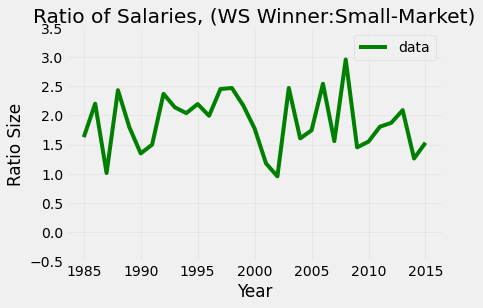

In [6]:
# Creating the ratio of championship salary divided by mean small market salary:
salary_ratio = ws_team_salary['salary'] / small_team_mean_sal['salary'] 
print('The mean salary ratio is', salary_ratio.mean())

plt.plot(small_team_mean_sal['yearID'], salary_ratio, label = 'data', c = "green") # Plotting the ratio
plt.grid(alpha=0.25) # Creating a grid
plt.title('Ratio of Salaries, (WS Winner:Small-Market)') # Creating plot title
plt.xlabel('Year') # Plot x-axis label
plt.ylabel('Ratio Size') # Plot y-axis label
plt.yticks(np.arange(-.5, 4, 0.5)) # Setting the y axis to go up from -0.5-4.0 in 0.5 intervals
plt.legend() # Creating a legend

### 1.2.7 PolyFit/Poly1d Models and Best Fit Lines

Another way I decided to measure the disadvantage small market teams are at is by creating Numpy Polyfit models and using the lines of best fit. These models are shown in the code below, and were a great way to visualize the trends between what it takes to be a World Series champion and what it means to be a small market team. 

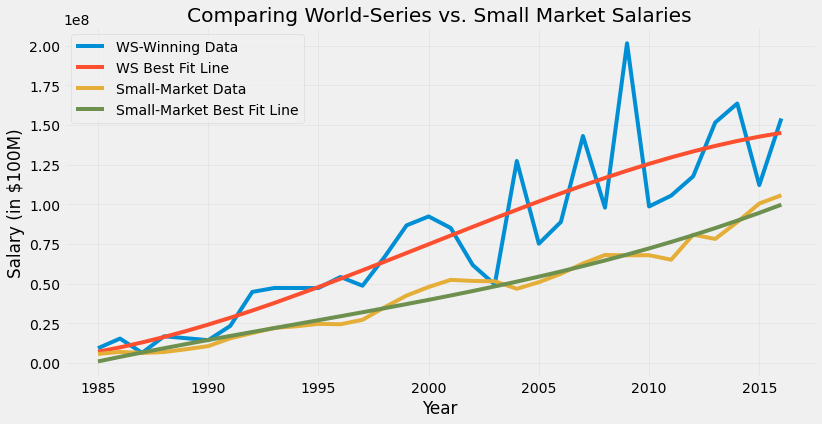

In [7]:
# The following two lines create a 3rd degree model and best fit line for the world series salary using PolyFit
model_ws = np.polyfit(ws_team_salary['yearID'], ws_team_salary['salary'], 3) 
model_line = np.poly1d(model_ws)


# The same polyfit technique is done again but for small market teams
model_small = np.polyfit(small_team_mean_sal['yearID'], small_team_mean_sal['salary'], 3) 
model_line2 = np.poly1d(model_small)


# The following code is plotting the data over the best fit lines created above. I included a legend with clear labels.
plt.figure(figsize=(12,6))
plt.grid(alpha=0.25)
plt.plot(ws_team_salary['yearID'], ws_team_salary['salary'], label = 'WS-Winning Data')
plt.plot(ws_team_salary['yearID'], model_line(ws_team_salary['yearID']), label = "WS Best Fit Line")
plt.title('Comparing World-Series vs. Small Market Salaries')
plt.xlabel('Year')
plt.ylabel('Salary (in $100M)')
plt.legend()
plt.plot(small_team_mean_sal['yearID'], small_team_mean_sal['salary'], label = 'Small-Market Data')
plt.plot(small_team_mean_sal['yearID'], model_line2(small_team_mean_sal['yearID']), label = "Small-Market Best Fit Line")
plt.title('Comparing World-Series vs. Small Market Salaries')
plt.xlabel('Year')
plt.ylabel('Salary (in $100M)')
plt.legend()

### 1.2.8 Continuing into Salaries by Position

Once I finished working with comparing world series to small market salaries, I shifted my focus on positional salaries and where teams, specifically small market, should allocate their salary.

The following code is loading in the "Postions" dataset which has many variable on defensive statistics. I filtered the data similarly to before to focus on seasons from 1985 to 2016. I also set the minimum games played to 10 games, which is the number it takes to qualify for eligibility at a position according to MLB.

In [8]:
# Loading in the 'fielding' dataset and filtering it from 1985-2016 
# I set a minimum games played at 10 games to qualify for a certain position

fielding = pd.read_csv("Sean Lahman Database (Baseball)/core/Fielding.csv",delimiter=',',skiprows=0,encoding='utf-8')
fielding_1 = fielding[fielding['yearID'] >= 1985]
fielding_2 = fielding_1[fielding_1['yearID'] < 2017]
fielding_new = fielding_2[fielding_2['G'] > 10]

After loading in and filtering the fielding data, I merged the salaries the same was as mentioned previously with the other datasets. In this step I also set filtered for only World Series winning teams. My plan was to analyze how championship teams split up their payroll, and see if there are any trends that small market teams should follow.

In [9]:
# Merging the fielding dataframe with the salaries dataframe:
fielding_salary  = fielding_new.merge(salaries, how = "left", on = ['yearID', 'teamID', 'playerID'])
# Merging again for the fielding salary of only world series teams using the teams dataset
ws_fielding_salary = fielding_salary.merge(teams, how = "left", on = ['yearID', 'teamID'])
ws_fielding_salary = ws_fielding_salary[['yearID', 'playerID', 'teamID', 'salary', 'POS', 'WSWin']] # Columns I want to include
ws_fielding_salary = ws_fielding_salary[ws_fielding_salary['WSWin'] == 'Y'] # Making sure this is for world series winning teams

# Finding the total salary of each position by grouping by position and year
ws_fielding_salary = ws_fielding_salary.groupby(['yearID', 'POS'], as_index = False).sum()
ws_fielding_salary.tail() # Viewing the last five entries. This shows the salary spent at five positions for the championship team in the 2016 season.

,yearID,POS,salary
212,2016,3B,1696000.0
213,2016,C,16500000.0
214,2016,OF,42885454.0
215,2016,P,85236000.0
216,2016,SS,1039000.0


### 1.2.9 Randomly Selecting Four Championship Teams

Next I decided to randomly select four world series champions to look at. I created a list of random values by looping through range set to 4 and appending a random integer into an empty list. This process is shown in the cell below.

*I will note that I did not run the loop since the random list outputted wouldn't be the same as the list I first generated and worked with. I manually created the list below the print statement to show the years I worked with.*

In [10]:
import random # Importing 'random' package 

random_list = [] # Creating an empty list that will be appended to during loop

for i in range(0,4): # Looping through 4 times, since I want to randomly select four teams
    x = random.randint(1985,2016) # Setting the random number to be from 1985 to 2016
    random_list.append(x) # Appending the random number into the empty list created in line 3

# print(random_list) 

list_outputed = [1996, 1998, 2011, 2016] # This is the list that I got the first time I ran this code 
list_outputed # Printing the 4 random seasons I will be working with

[1996, 1998, 2011, 2016]

#### 1.2.10 Sorting datasets in Order

The next cell is creating four different datasets (1 for each year randomly selected). These datasets show the salary by position of the team that won the World Series that year.

After creating the datasets, I sorted each one to go in ascending order for visualization purposes.

In [11]:
# The following 4 lines of code are creating four new dataframes, one for each randomly selected season
ws_fielding_salary96 = ws_fielding_salary[ws_fielding_salary['yearID'] == 1996]
ws_fielding_salary98 = ws_fielding_salary[ws_fielding_salary['yearID'] == 1998]
ws_fielding_salary11 = ws_fielding_salary[ws_fielding_salary['yearID'] == 2011]
ws_fielding_salary16 = ws_fielding_salary[ws_fielding_salary['yearID'] == 2016]

# The next 4 lines of code or sorting these salaries in ascending order
fielding_sorted96 = ws_fielding_salary96.sort_values('salary')
fielding_sorted98 = ws_fielding_salary98.sort_values('salary')
fielding_sorted11 = ws_fielding_salary11.sort_values('salary')
fielding_sorted16 = ws_fielding_salary16.sort_values('salary')

### 1.2.11 Visualizing Position Salaries with Subplots

Lastly, I created a 2x2 subplot of bargraphs to show the amount spent by position for each of the four randomly selected World Series winners. There were some interesting trends shown that I will expand further on in the "Results" section.

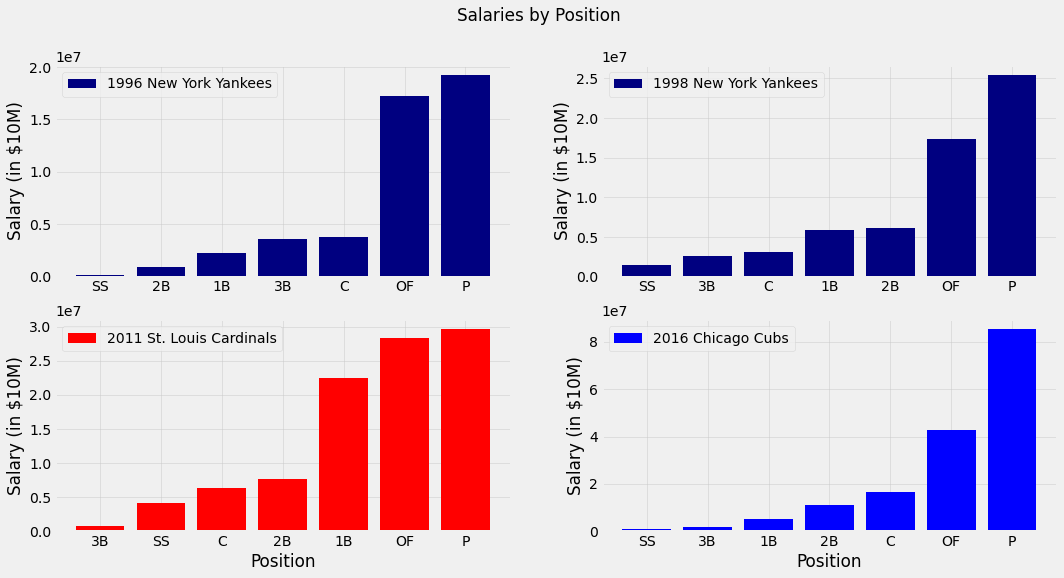

In [18]:
plt.figure(figsize=(16,8)) # Setting figure size
plt.subplot(221) # Creating the first plot of a 2x2 subplot
plt.suptitle("Salaries by Position") # Creating a title for the overall subplot
# The next 4 lines of code are all for the first subplot
plt.bar(fielding_sorted96['POS'], fielding_sorted96['salary'], color = 'navy', label = '1996 New York Yankees')
plt.grid(alpha=0.5)
plt.ylabel('Salary (in $10M)')
plt.legend()

# The next five lines of code are for the second subplot
plt.subplot(222)
plt.bar(fielding_sorted98['POS'], fielding_sorted98['salary'], color = 'navy', label = '1998 New York Yankees')
plt.grid(alpha=0.5)
plt.ylabel('Salary (in $10M)')
plt.legend()

# The next five lines of code are for the third subplot 
plt.subplot(223)
plt.bar(fielding_sorted11['POS'], fielding_sorted11['salary'], color = 'red', label = '2011 St. Louis Cardinals')
plt.grid(alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Salary (in $10M)')
plt.legend()

# The next five lines of code are for the fourth subplot
plt.subplot(224)
plt.bar(fielding_sorted16['POS'], fielding_sorted16['salary'], color = 'blue', label = '2016 Chicago Cubs')
plt.grid(alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Salary (in $10M)')
plt.legend()

## 1.3 Results

### 1.3.1 Bar Graph Results

From the plot below, it is very easy and clear to see there is a clear difference between the salary of a World Series Championship team and the average small market team. There are only three years (1987, 1994, and 2003) where the mean small market salary is greater than or equal to the championship salary for that respective year. That comes out to only 9.6% of the years I analyzed. This plot shows that the mean small smarket salary will win a championship 1 out of almost every 10 years. This equates to small market teams being at about a *10x disadvantage.*

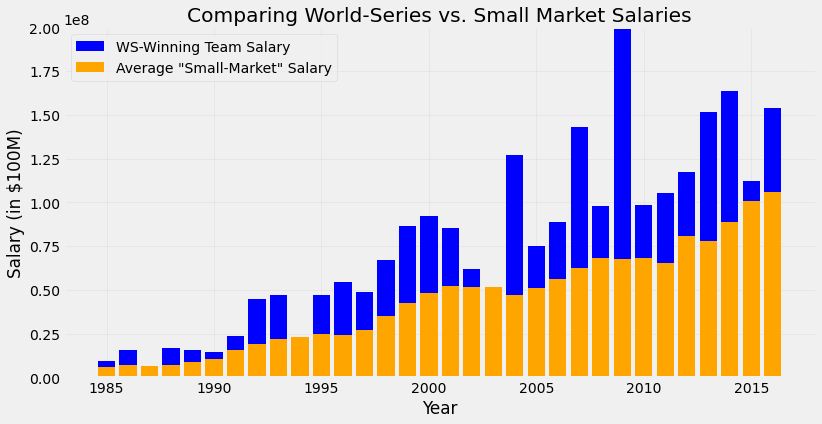

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.bar(ws_team_salary['yearID'], ws_team_salary['salary'], label = 'WS-Winning Team Salary', color = "blue")
plt.bar(small_team_mean_sal['yearID'], small_team_mean_sal['salary'], label = 'Average "Small-Market" Salary', color = 'orange')
plt.grid(alpha=0.25)
plt.title('Comparing World-Series vs. Small Market Salaries')
plt.xlabel('Year')
plt.ylabel('Salary (in $100M)')
plt.ylim((0,200000000))
plt.legend()


### 1.3.2 Ratio Plot Results

To go even further, the ratio plot shows the in-depth disadvantage these small market teams are at. Most years the ratio of the championship salary to the small market salary is sitting in the range of 2.0-2.5. Some years it goes as high as 3x. This means that big market teams are spending double and even triple the amount of the average small market teams to win the World Series.

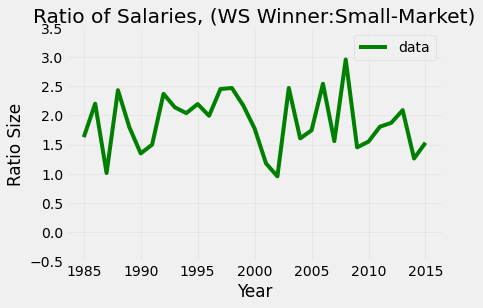

In [14]:
plt.plot(small_team_mean_sal['yearID'], salary_ratio, label = 'data', c = "green")
plt.grid(alpha=0.25)
plt.title('Ratio of Salaries, (WS Winner:Small-Market)')
plt.xlabel('Year')
plt.ylabel('Ratio Size')
plt.yticks(np.arange(-.5, 4, 0.5))
plt.legend()

### 1.3.3 PolyFit Models and Best Fit Line Results

The polyfit models were a great way to assess the data in a different way. The plot shows the trends of each group I was looking at, and importantly how much these two trends differ. There is not a single point where the small market best-fit line is higher than the World Series best-fit line. This proves that while even though there are some years where a small salary team wins the world series, it is more an outlier of the data and does not follow the general trend. I went to the 3rd degree when creating the models to keep the line close to the data while still being able to see the general trend.

The line of best fit for the mean salary of a small-market team is:
      3             2
1876 x - 1.122e+07 x + 2.237e+10 x - 1.487e+13
The line of best fit for the salary of world series winning teams is:
       3             2
-4385 x + 2.631e+07 x - 5.261e+10 x + 3.507e+13


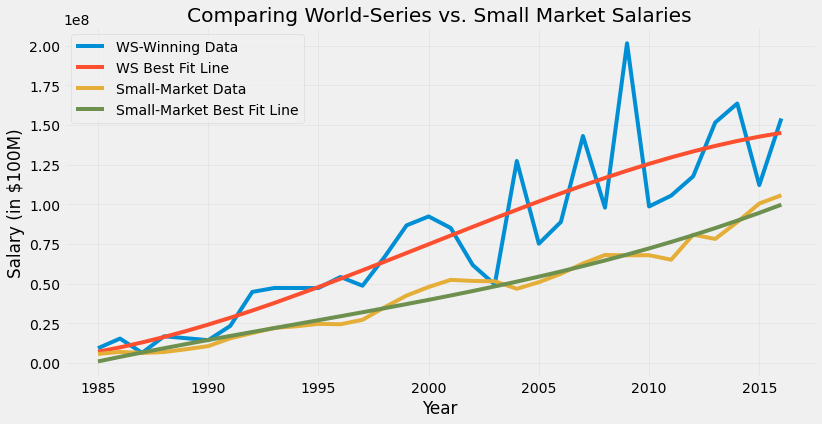

In [15]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.25)
plt.plot(ws_team_salary['yearID'], ws_team_salary['salary'], label = 'WS-Winning Data')
plt.plot(ws_team_salary['yearID'], model_line(ws_team_salary['yearID']), label = "WS Best Fit Line")
plt.title('Comparing World-Series vs. Small Market Salaries')
plt.xlabel('Year')
plt.ylabel('Salary (in $100M)')
plt.legend()
plt.plot(small_team_mean_sal['yearID'], small_team_mean_sal['salary'], label = 'Small-Market Data')
plt.plot(small_team_mean_sal['yearID'], model_line2(small_team_mean_sal['yearID']), label = "Small-Market Best Fit Line")
plt.title('Comparing World-Series vs. Small Market Salaries')
plt.xlabel('Year')
plt.ylabel('Salary (in $100M)')
plt.legend()

print('The line of best fit for the mean salary of a small-market team is:')
print(model_line2)


print('The line of best fit for the salary of world series winning teams is:')
print(model_line)

### 1.3.4 Analyzing Where Small Market Teams should Allocate Salary

After visualizing the four random championship teams' payrolls, it was clear that pitcher and outfield were the most expensive positions. Now one reason for this is that there is more of these positions on each team (3 outfielders and 10+ pitchers). However, outfield was by far more than 3x costly than most other positions for all four championship teams. On the other side, it seems the left side of the infield (shortstop and third base) are not as important for the payroll.

The cheapness of the shortstop position came as a bit of a surprise to me since it is considered to be the "captain of the infield" and a team leader. According to the data however, it is better to have a cheap shortstop and spend money in other places. Defensively, it makes sense as their is an abundance of excellent defenders at shortstop. This results in a cheap cost for a defense-first shortstop. 

One other thing to note is the importance of the catcher position. It makes sense for teams to spend a good portion of their payroll here due to all the responsibilites a catcher has- such as framing, pitch calling, leadership, and overall game IQ.

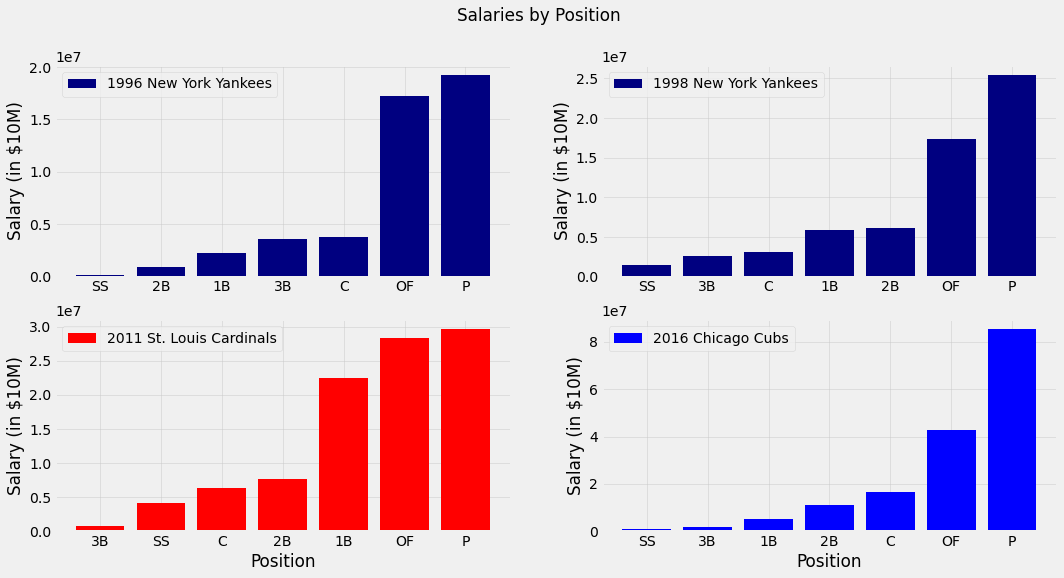

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.suptitle("Salaries by Position")
plt.bar(fielding_sorted96['POS'], fielding_sorted96['salary'], color = 'navy', label = '1996 New York Yankees')
plt.grid(alpha=0.5)
plt.ylabel('Salary (in $10M)')
plt.legend()


plt.subplot(222)
plt.bar(fielding_sorted98['POS'], fielding_sorted98['salary'], color = 'navy', label = '1998 New York Yankees')
plt.grid(alpha=0.5)
plt.ylabel('Salary (in $10M)')
plt.legend()


plt.subplot(223)
plt.bar(fielding_sorted11['POS'], fielding_sorted11['salary'], color = 'red', label = '2011 St. Louis Cardinals')
plt.grid(alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Salary (in $10M)')
plt.legend()


plt.subplot(224)
plt.bar(fielding_sorted16['POS'], fielding_sorted16['salary'], color = 'blue', label = '2016 Chicago Cubs')
plt.grid(alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Salary (in $10M)')
plt.legend()

## 1.4 Synthesis and Discussion

### 1.4.1 What I Learned From the Results

After completing my analysis and visualizations, it is clear to me that small market MLB teams are at a major disadvantage. The average ratio of the championship payroll to a small market payroll is 1.86. This means that to win the World Series, a team has to spend nearly 2x more than the average small market team. 

This large disadvantage makes prioritizing the right portion of salary in the correct positions essential for these smaller teams. After analyzing the randomly selected Championship teams, I believe the most important positions to spend on are pitchers, outfielders, and catcher. The least important position to prioritie is shortstop, as neither of the four teams spent over $5 million dollars on that position.  



### 1.4.2 Errors and Obstacles

 There were a few problems I ran into when completing this project. The main problem was in analyzing salaries by position. The dataset I used had multiple entries for some players, due to playing multiple positions, and that made things difficult. More specifically, this got in way of grouping salary by position. For example, if Ben Zobrist earned 15M in 2016 but played SS, 2B, and OF, then that same 15 million was used seperately for 3 different positions when in reality the team only payed that amount one time to one player, not three.

Another issue with the positions dataset was the generalization of positions. Ideally, I would have liked a variable for Right Field, Center Field, and Left Field, along with Starting Pitchers and Relievers. This would have been better for the type of visualization I used in determining which specific positions are more expensive.


### 1.4.3 Final Thoughts

Overall, I am very happy with how the project turned out. This was a topic I was very interested in, and I think that helped with the coding since I knew *what* exactly I wanted to code for. The results and conclusions I came to were pretty on par with my personal hypothesis, and I was excited to get my code to work. It was cool to be able to visualize these trends I have heard so much about on TV and all over the media. 

The payroll gap in the MLB *is* an issue that I think will have to be addressed sooner rather than later, and the data backs it up!

## 1.5 References

“Code Faster with Line-of-Code Completions, Cloudless Processing.” Kite, 
www.kite.com/python/answers/how-to-group-a-pandas-dataframe-by-column-names-and-sum-over-each-group-in-python. 

Lahman, Sean. “Download Lahman's Baseball Database.” SeanLahman.com, 16 Feb. 2021, www.seanlahman.com/baseball-archive/statistics/. 

“Pandas.DataFrame.merge¶.” Pandas.DataFrame.merge - Pandas 1.2.4 Documentation, pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html. 

Trueblood, Matt. “Power Ranking All 30 MLB Teams by Market Size.” Bleacher Report, Bleacher Report, 3 Oct. 2017, bleacherreport.com/articles/961412-mlb-power-rankings-all-30-mlb-teams-by-market-size. 